<a href="https://colab.research.google.com/github/Sihan-A/PyTorch/blob/main/NLP/Google_Play_Reviews__Sentiment_Analysis_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qq google-play-scraper

     |████████████████████████████████| 52 kB 560 kB/s 


In [2]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments. lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

APP ANNIE

In [3]:
app_packages = [
    'com.anydo',
    'com.todoist',
    'com.ticktick.task',
    'com.habitrpg.android.habitica', 
    'cc.forestapp',
    'com.oristats.habitbull',
    'com.levor.liferpgtasks',
    'com.habitnow',
    'com.microsoft.todos',
    'prox.lab.calclock',
    'com.gmail.jmartindev.timetune',
    'com.artfulagenda.app',
    'com.tasks.android',
    'com.appgenix.bizcal',
    'com.appxy.planner'
]

In [4]:
len(app_packages)

15

In [5]:
app_infos =[]
for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████| 15/15 [00:02<00:00,  5.96it/s]


In [6]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str
    )
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [7]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.anydo",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 to do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver 30M people rely on Any.do to stay organized and get more done.\r\nIt's a simple to do list app with reminders, planner & calendar - all in one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list & planner support

In [8]:
def format_title(title):
    sep_index = title.find(':') if title.find(':')!= -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
    return title[:10]

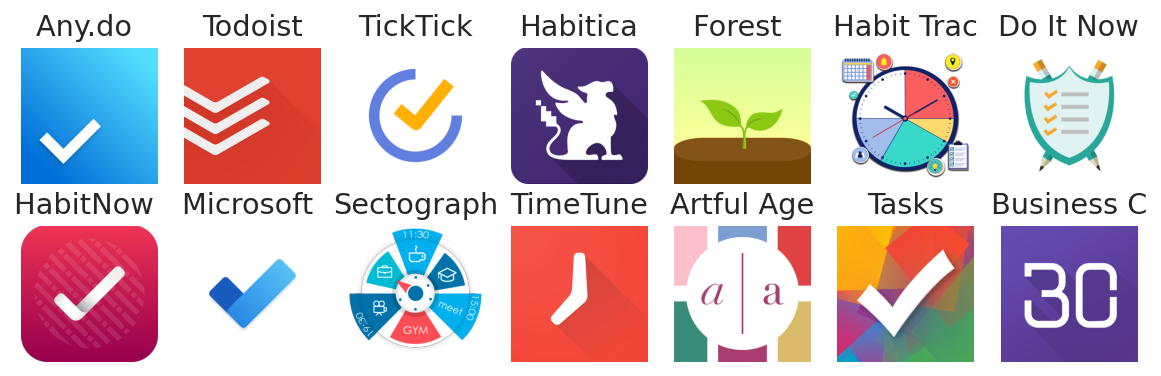

In [9]:
fig, axs = plt.subplots(2, len(app_infos)//2, figsize=(10,3))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

In [10]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head()

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,inAppProductPrice,size,androidVersion,androidVersionText,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,developerInternalID,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,similarApps,moreByDeveloper,appId,url
0,"Any.do - To do list, planner & calendar","🥇 <b>""#1 to do list app out there”</b> - WSJ\r...",🥇 <b>&quot;#1 to do list app out there”</b> - ...,"Simple planner with to-do list, tasks, reminde...","Simple planner with to-do list, tasks, reminde...","10,000,000+",10000000,4.518146,397588,134004,"[20270, 6590, 18742, 53242, 298744]",0,True,USD,False,None,None,None,True,$0.99 - $83.88 per item,Varies with device,Varies,Varies with device,Any.do To-do list & Calendar,5304780265295461149,feedback+androidtodo@any.do,https://www.any.do,"Any.do Inc.\n\n156 Begin St. 22nd floor, Tel A...",https://www.any.do/privacy,5304780265295461149,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/zgOLUXCH...,https://play-lh.googleusercontent.com/umhDP6ph...,[https://play-lh.googleusercontent.com/cGoZDZR...,None,None,Everyone,None,None,False,"Nov 10, 2011",1628143078,Varies with device,What's new?\r\n- Filters! You can now filter y...,What&#39;s new?<br>- Filters! You can now filt...,False,"[com.splendapps.splendo, com.todoist, com.micr...",None,com.anydo,https://play.google.com/store/apps/details?id=...
1,"Todoist: To-Do List, Tasks & Reminders","🏆 <b>2020 Editor's Choice</b> by Google\r\n🥇 ""...",🏆 <b>2020 Editor&#39;s Choice</b> by Google<br...,“The best to-do list app right now” - The Verg...,“The best to-do list app right now” - The Verg...,"10,000,000+",10000000,4.536062,230668,69319,"[10818, 3842, 8652, 34910, 172446]",0,True,USD,False,None,None,None,True,$0.99 - $36.00 per item,Varies with device,Varies,Varies with device,Doist,6748661820728732000,support@todoist.com,http://todoist.com,"Doist\n201 Mission Street, Suite 1200\nSan Fra...",https://todoist.com/privacy,6748661820728732000,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/GK0SwEBV...,https://play-lh.googleusercontent.com/sAjzU1fU...,[https://play-lh.googleusercontent.com/cealfl9...,None,None,Everyone,None,None,False,"Nov 18, 2012",1632251727,Varies with device,⭐️ Not just experimental anymore: The new desi...,⭐️ Not just experimental anymore: The new desi...,False,"[com.anydo, com.fenchtose.reflog, com.microsof...",None,com.todoist,https://play.google.com/store/apps/details?id=...
2,"TickTick: ToDo List Planner, Reminder & Calendar",🥇<b>Great to-do list app for new Android devic...,🥇<b>Great to-do list app for new Android devic...,Task & time manager by Editor’s Choice🏆. Get t...,Task &amp; time manager by Editor’s Choice🏆. G...,"1,000,000+",1000000,4.616038,84599,30884,"[2903, 1316, 3102, 10714, 66564]",0,True,USD,False,None,None,None,True,$0.99 - $27.99 per item,Varies with device,Varies,Varies with device,Appest Inc.,7269704759597705101,ticktick.com@gmail.com,https://ticktick.com,2035 Sunset Lake Road\nNewark\nDelaware\nUS,https://ticktick.com/about/privacy,7269704759597705101,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/YSlqf3WB...,https://play-lh.googleusercontent.com/m-kwaaJE...,[https://play-lh.googleusercontent.com/32pfblb...,None,None,Everyone,None,None,False,"Jun 19, 2013",1631522640,Varies with device,- Optimize performance and interaction.,- Optimize performance and interaction.,False,"[com.todoist, todolist.scheduleplanner.dailypl...",None,com.ticktick.task,https://play.google.com/store/apps/details?id=...
3,Habitica: Gamify Your Tasks,Treat your life like a game to stay motivated ...,Treat your life like a game to stay motivated ...,Treat your life like a game 

In [11]:
app_infos_df.to_csv('apps.csv', index=None, header=True)

Get app reviews

In [12]:
app_reviews = []
for ap in tqdm(app_packages):
    for score in range(1,6):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs = reviews(
                ap,
                lang='en',
                country='us',
                sort=sort_order,
                count=200 if score == 3 else 100,
                filter_score_with=score,
            )[0]
            for r in rvs:
                r['sortorder'] ='most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)

100%|██████████| 15/15 [01:03<00:00,  4.20s/it]


In [13]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "at": "2021-09-18 18:58:45",
  "content": "I downloaded this app specifically for the missed call banner notifications, but the missed call option is not available in settings. This seems to be a feature that was removed, but the only feature I got and wanted this app for. And there is no way to know this before making an account (that I now have to get deleted).",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "5.15.1.6",
  "reviewId": "gp:AOqpTOH2jF_SnBiL6imwq0aRzv_uvfwsDVZwQ8haRJSwnyRRE0CWzfYqqNYp-8WpGi2Tf4aJIbOLCE_1n1m89A",
  "score": 1,
  "sortorder": "most_relevant",
  "thumbsUpCount": 24,
  "userImage": "https://play-lh.googleusercontent.com/a/AATXAJwCT5tVF1BqswRK7-sWXgi2v_qVEOoU0HGf6qU0=mo",
  "userName": "Goldfish"
}



In [14]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.shape

(16788, 12)

In [15]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortorder,appId
0,gp:AOqpTOH2jF_SnBiL6imwq0aRzv_uvfwsDVZwQ8haRJS...,Goldfish,https://play-lh.googleusercontent.com/a/AATXAJ...,I downloaded this app specifically for the mis...,1,24,5.15.1.6,2021-09-18 18:58:45,None,NaT,most_relevant,com.anydo
1,gp:AOqpTOHMGLwtbZHRkwU82NPaIwZNKkyg1A8H2byVsPu...,Kristina Downs,https://play-lh.googleusercontent.com/a-/AOh14...,I have been using this app for 2 years and had...,1,0,5.15.1.6,2021-09-10 11:39:25,We're sorry to hear you're experiencing issues...,2021-09-12 13:34:01,most_relevant,com.anydo
2,gp:AOqpTOGw0jBJ0bdj9A9rfU0K94KztVF1LbPm4J3OMoM...,Almighty Dodorex,https://play-lh.googleusercontent.com/a-/AOh14...,I have adhd and wanted to try this app out to ...,1,2,5.15.1.6,2021-09-01 06:20:25,The Recurring tasks are available for Free to ...,2021-09-06 06:03:37,most_relevant,com.anydo
3,gp:AOqpTOEQEKUS7I0TtYqIUH03SWukr2WR51nrAd5uhdl...,Hirak Hax,https://play-lh.googleusercontent.com/a/AATXAJ...,Basic features. Whatsapp integration is useles...,1,4,5.15.1.6,2021-09-01 03:30:31,"Hi, we're sorry to hear you're experiencing is...",2021-09-05 15:23:54,most_relevant,com.anydo
4,gp:AOqpTOFI9-swY4T-XNYP-cgytVpluNAG3Sj5ffX5j4B...,ivo dcosta,https://play-lh.googleusercontent.com/a-/AOh14...,Was working ok until March...Now keeps crashin...,1,2,5.15.1.6,2021-08-26 04:49:39,We're sorry to hear you're experiencing issues...,2021-08-26 08:23:57,most_relevant,com.anydo


In [16]:
app_reviews_df.to_csv("reviews.csv", index=None, header=True)